# Beamforming-LLM

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
projDir = "/content/drive/MyDrive/Spring 2025/Embedded AI/Project/"

The inputs to this notebook would be separated outputs from beamforming. Here, we will use ground truth YouTube podcasts as a placeholder and later on in the notebook, with a change of variable, load the beamformed outputs.

## 1. Download conversations

In [ ]:
# Install yt-dlp and ffmpeg
!pip install -q yt-dlp
!apt-get -y install ffmpeg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.3/173.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 47.2 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
import yt_dlp

def download_audio_as_wav_mono(youtube_url, output_dir=projDir + "audio"):
    ydl_opts = {
        'format': 'bestaudio/best',
        'outtmpl': f'{output_dir}/%(title)s.%(ext)s',
        'postprocessors': [{
            'key': 'FFmpegExtractAudio',
            'preferredcodec': 'wav',
            'preferredquality': '0',
        }],
        'quiet': False,
        'noplaylist': True,
    }

    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        ydl.download([youtube_url])

In [ ]:
def download_subtitles(youtube_url, output_dir=projDir + "subtitles"):
    ydl_opts = {
        'writeautomaticsub': True,
        'skip_download': True,
        'subtitleslangs': ['en-IN', 'en'],
        'outtmpl': f'{output_dir}/%(title)s.%(ext)s'}

    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
      ydl.download([youtube_url])

In [ ]:
url1 = "https://www.youtube.com/watch?v=JAgHUDhaTU0" # Nikhil Kamath x Yann LeCun
url2 = "https://www.youtube.com/watch?v=DqYY5E4BcmA" # Humans of Bombay x Finance with Sharan

In [ ]:
download_audio_as_wav_mono(url1)

[youtube] Extracting URL: https://www.youtube.com/watch?v=JAgHUDhaTU0
[youtube] JAgHUDhaTU0: Downloading webpage
[youtube] JAgHUDhaTU0: Downloading tv client config
[youtube] JAgHUDhaTU0: Downloading tv player API JSON
[youtube] JAgHUDhaTU0: Downloading ios player API JSON
[youtube] JAgHUDhaTU0: Downloading m3u8 information
[info] JAgHUDhaTU0: Downloading 1 format(s): 251
[download] Destination: /content/drive/MyDrive/Spring 2025/Embedded AI/Project/audio/WTF is Artificial Intelligence Really？ ｜ Yann LeCun x Nikhil Kamath  ｜ People by WTF Ep #4.webm
[download] 100% of   76.49MiB in 00:00:02 at 31.75MiB/s  
[ExtractAudio] Destination: /content/drive/MyDrive/Spring 2025/Embedded AI/Project/audio/WTF is Artificial Intelligence Really？ ｜ Yann LeCun x Nikhil Kamath  ｜ People by WTF Ep #4.wav
Deleting original file /content/drive/MyDrive/Spring 2025/Embedded AI/Project/audio/WTF is Artificial Intelligence Really？ ｜ Yann LeCun x Nikhil Kamath  ｜ People by WTF Ep #4.webm (pass -k to keep)


In [ ]:
download_subtitles(url1)

[youtube] Extracting URL: https://www.youtube.com/watch?v=JAgHUDhaTU0
[youtube] JAgHUDhaTU0: Downloading webpage
[youtube] JAgHUDhaTU0: Downloading tv client config
[youtube] JAgHUDhaTU0: Downloading tv player API JSON
[youtube] JAgHUDhaTU0: Downloading ios player API JSON
[youtube] JAgHUDhaTU0: Downloading m3u8 information
[info] JAgHUDhaTU0: Downloading subtitles: en-IN
[info] JAgHUDhaTU0: Downloading 1 format(s): 401+251
[info] Writing video subtitles to: /content/drive/MyDrive/Spring 2025/Embedded AI/Project/subtitles/WTF is Artificial Intelligence Really？ ｜ Yann LeCun x Nikhil Kamath  ｜ People by WTF Ep #4.en-IN.vtt
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 10
[download] Destination: /content/drive/MyDrive/Spring 2025/Embedded AI/Project/subtitles/WTF is Artificial Intelligence Really？ ｜ Yann LeCun x Nikhil Kamath  ｜ People by WTF Ep #4.en-IN.vtt
[download] 100% of  138.01KiB in 00:00:00 at 188.13KiB/s                 


In [ ]:
download_subtitles(url2)

[youtube] Extracting URL: https://www.youtube.com/watch?v=DqYY5E4BcmA
[youtube] DqYY5E4BcmA: Downloading webpage
[youtube] DqYY5E4BcmA: Downloading tv client config
[youtube] DqYY5E4BcmA: Downloading tv player API JSON
[youtube] DqYY5E4BcmA: Downloading ios player API JSON
[youtube] DqYY5E4BcmA: Downloading m3u8 information
[info] DqYY5E4BcmA: Downloading subtitles: en
[info] DqYY5E4BcmA: Downloading 1 format(s): 401+251
[info] Writing video subtitles to: /content/drive/MyDrive/Spring 2025/Embedded AI/Project/subtitles/@financewithsharan on Personal Finance, Investments & SEBI Regulations ｜ Karishma Mehta ｜ EP 91.en.vtt
[download] Destination: /content/drive/MyDrive/Spring 2025/Embedded AI/Project/subtitles/@financewithsharan on Personal Finance, Investments & SEBI Regulations ｜ Karishma Mehta ｜ EP 91.en.vtt
[download] 100% of  587.34KiB in 00:00:00 at 3.19MiB/s


Once downloaded, rename and convert to mono using the following ffmpeg command on terminal.

```
ffmpeg -i input.wav -ac 1 output_mono.wav
```

## 2. Transcribe the conversations (GPU needed)

In [ ]:
# Install Whisper
!pip install -U openai-whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.5/800.5 kB 10.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s

In [ ]:
# Declare model
import whisper

model = whisper.load_model("turbo")

100%|█████████████████████████████████████| 1.51G/1.51G [00:27<00:00, 58.8MiB/s]


In [ ]:
# T_START = 16
# T_END = 3660

In [ ]:
# Transcribe the mixture conversation from the reference mic (mic0)
import time

print("Transcribing conversations...")
print("\n")
print('----' * 20)
startTime = time.time()
result_mix = model.transcribe(projDir + "real_recordings/FullTest_Crop.wav")
endTime = time.time()
print("Done transcribing Mix.")
print("Time taken: ", endTime - startTime)
print('----' * 20)

Transcribing conversations...


--------------------------------------------------------------------------------
Done transcribing Mix.
Time taken:  242.95435237884521
--------------------------------------------------------------------------------


In [ ]:
# Save the mix transcription
import pickle

with open(projDir + f'transcripts/Conv_mix_real_recording.pkl', 'wb') as f:
    pickle.dump(result_mix, f)

In [ ]:
result_mix['text'][:500]

" I want to get into an innocent banking. To get into an innocent banking, I get a good MBA policy. To get an MBA and a good resume. For one month, I had gotten like 300 subscribers. People confuse filing your taxes at the end of the year as tax plans. Money should be used on your needs. 30% on wants and then 20% should be saved. I actually disagree with that. Buying a house is the biggest financial decision of your life. He could buy any house he wants in the world, but he doesn't buy. How do yo"

In [ ]:
# Transcribe the beamformed conversations, also measure time
import time

print("Transcribing conversations...")
print("\n")
print('----' * 20)
startTime = time.time()
result1 = model.transcribe(projDir + "real_recordings/FullTest_Sep_Conv1_Crop.wav")
endTime = time.time()
print("Done transcribing Conv1.")
print("Time taken: ", endTime - startTime)
print('----' * 20)

print("\n")
print('----' * 20)
startTime = time.time()
result2 = model.transcribe(projDir + "real_recordings/FullTest_Sep_Conv2_Crop.wav")
endTime = time.time()
print("Done transcribing Conv2.")
print("Time taken: ", endTime - startTime)
print('----' * 20)

Transcribing conversations...


--------------------------------------------------------------------------------
Done transcribing Conv1.
Time taken:  173.5829358100891
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
Done transcribing Conv2.
Time taken:  201.9646430015564
--------------------------------------------------------------------------------


In [ ]:
result1['text']

" Thank you. I thought we could use today to figure out, A, what is AI? How did we get here? What likely next? As an Indian 20-year-old who wants to build a business in AI, a career in AI, what do we do? Today? Today. Like right now? Yeah. Hi, Jan. Good morning. Thank you for doing this. Pleasure. The very first thing we like to do is get to know you a bit more, how you came to be what you are today. Could you tell us a little bit about where you were born, where you grew up leading up to today? So I grew up near Paris in the summers. My dad was an engineer and I learned almost everything from him and always was interested in science and technology since I was a little kid and always saw myself as becoming an engineer. I had no idea how you became a scientist, but I became interested in this afterwards. What is the difference between an engineer and a scientist? Well, it is very difficult to define and very often you have to be a little bit of both. When you were in the corporate space

In [ ]:
result2['text']

" I want to get into investment banking. To get into investment banking I need a good MBA college. To get into MBA I need a good resume. For one month I had gotten like 300 subscribers. People confuse filing your taxes at the end of the year as tax plan. Money should be used on your needs, 30% on wants and then 20% should be saved. I actually disagree with that. Buying a house is the biggest financial decision of your life. He could buy any house he wants in the world when he doesn't buy. How do you plan for an emergency fund? And what goes into an emergency fund? First make an FD and then get a credit card against that FD so that if you default on your payment the bank will suck out the money from that FD so that you don't have to bear the interest rate. Home loan, that's a good debt and even if I have let's say 3 crores in the bank I will not take that entire 3 crores and buy the house. 25 lakhs overnight when I wake up 25 lakhs. How do we? Good. Good. Good. Unlock the secrets of fin

In [ ]:
# Transcribe the ground truth conversations, also measure time
import time

print("Transcribing conversations...")
print("\n")
print('----' * 20)
startTime = time.time()
result1 = model.transcribe(projDir + "audio/Conv1_mono.wav")
endTime = time.time()
print("Done transcribing Conv1.")
print("Time taken: ", endTime - startTime)
print('----' * 20)

print("\n")
print('----' * 20)
startTime = time.time()
result2 = model.transcribe(projDir + "audio/Conv2_mono.wav")
endTime = time.time()
print("Done transcribing Conv2.")
print("Time taken: ", endTime - startTime)
print('----' * 20)

Transcribing conversations...


--------------------------------------------------------------------------------
Done transcribing Conv1.
Time taken:  173.6363787651062
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
Done transcribing Conv2.
Time taken:  148.94425177574158
--------------------------------------------------------------------------------


In [ ]:
type(result1)

dict

In [ ]:
result1.keys()

dict_keys(['text', 'segments', 'language'])

In [ ]:
result2['text'][:200]

' I want to get into investment banking. Yeah. To get into investment banking, I need a good MBA college. Yeah. To get an MBA, I need a good resume. Correct. For one month, I had gotten like 300 subscr'

In [ ]:
result1['segments'][510]

{'id': 510,
 'seek': 271824,
 'start': 2725.24,
 'end': 2726.24,
 'text': ' It will learn with fewer samples.',
 'tokens': [50715, 467, 486, 1466, 365, 13366, 10938, 13, 50765],
 'temperature': 0.0,
 'avg_logprob': -0.10665287290300642,
 'compression_ratio': 1.55793991416309,
 'no_speech_prob': 2.4851717905782778e-12}

In [ ]:
result1['language']

'en'

In [ ]:
# Save the transcripts
import pickle

for idx, result in enumerate([result1, result2]):
    with open(projDir + f'transcripts/Conv{idx+1}_real_recording.pkl', 'wb') as f:
        pickle.dump(result, f)

## 3. Chunk and embed into a vector database

In [ ]:
# Load the transcripts (beamformed)
import pickle

with open(projDir + 'transcripts/Conv1_real_recording.pkl', 'rb') as f:
    result1 = pickle.load(f)

with open(projDir + 'transcripts/Conv2_real_recording.pkl', 'rb') as f:
    result2 = pickle.load(f)

In [ ]:
# Load the transcripts (ground truth)
import pickle

with open(projDir + 'transcripts/Conv1.pkl', 'rb') as f:
    result1 = pickle.load(f)

with open(projDir + 'transcripts/Conv2.pkl', 'rb') as f:
    result2 = pickle.load(f)

In [ ]:
result1['segments'][111]

{'id': 111,
 'seek': 50102,
 'start': 501.02,
 'end': 502.02,
 'text': " We're making mistakes.",
 'tokens': [50365, 492, 434, 1455, 8038, 13, 50415],
 'temperature': 0.0,
 'avg_logprob': -0.14016106985147717,
 'compression_ratio': 1.9064039408866995,
 'no_speech_prob': 6.005336419118157e-12}

In [ ]:
# Add direction labels and generate chunks

def create_chunks(segments, direction, N=3):

    chunks = []

    chunk_id = 0
    for i in range(0, len(segments), N):
        group = segments[i:i+N]
        chunk_text = " ".join([seg['text'] for seg in group])
        chunk_start = group[0]['start']
        chunk_end = group[-1]['end']
        segment_ids = [seg['id'] for seg in group]

        chunks.append({
            'text': chunk_text.strip(),
            'start_time': chunk_start,
            'end_time': chunk_end,
            'direction': direction,
            'segment_ids': segment_ids,
            'chunk_id': chunk_id
        })

        chunk_id += 1

    return chunks

# The following function chunks every sentence separately
# def create_chunks(segments, direction):
#     return [
#         {
#             'id': seg['id'],
#             'text': seg['text'],
#             'start_time': seg['start'],
#             'end_time': seg['end'],
#             'direction': direction
#         }
#         for seg in segments
#     ]

chunks_left = create_chunks(result1['segments'], 'left')
chunks_right = create_chunks(result2['segments'], 'right')
all_chunks = chunks_left + chunks_right

In [ ]:
len(chunks_left), len(chunks_right)

(288, 735)

In [ ]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 55.4 MB/s eta 0:00:00


In [ ]:
# Embed text of chunks into VectorDB
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np

model = SentenceTransformer("all-MiniLM-L6-v2")

texts = [chunk['text'] for chunk in all_chunks]
embeddings = model.encode(texts)

# Create FAISS index
index = faiss.IndexFlatL2(embeddings.shape[1])
index.add(np.array(embeddings))

# Keep track of metadata
metadata = all_chunks

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## 4. Testing a query

In [ ]:
# Testing and visualizing query
toRetrieveTopic = "reinforcement learning being very good for games"
toRetrieveDirn = "left"

query_embedding = model.encode([toRetrieveTopic])
D, I = index.search(query_embedding, k=30) # Oversampling

# Obtain relevant records along with their distance
retrieved_chunks = [
    (metadata[i], float(d)) for i, d in zip(I[0], D[0]) if metadata[i]['direction'] == toRetrieveDirn
]

# Add the distances into the query
for chunkMetadata, distance in retrieved_chunks:
    chunkMetadata['distance'] = distance

retrieved_chunks2 = []
for chunkMetadata, _ in retrieved_chunks:
      retrieved_chunks2.append(chunkMetadata)

retrieved_chunks = retrieved_chunks2
del retrieved_chunks2

retrieved_chunks = retrieved_chunks[0:10] # Pick top-5

In [ ]:
len(retrieved_chunks)

10

In [ ]:
retrieved_chunks

[{'text': "You know, it's very efficient.  If you want to train a system to play chess or go or things like that,  like that, poker, reinforcement learning is great because you can have the system play millions",
  'start_time': 2628.84,
  'end_time': 2637.84,
  'direction': 'left',
  'segment_ids': [678, 679, 680],
  'chunk_id': 226,
  'distance': 0.48052990436553955},
 {'text': "They don't fall under reinforcement learning?  No.  It's more similar to supervised learning.",
  'start_time': 2016.02,
  'end_time': 2021.02,
  'direction': 'left',
  'segment_ids': [513, 514, 515],
  'chunk_id': 171,
  'distance': 0.6855834126472473},
 {'text': 'and companies like DeepMind set themselves up with the idea that reinforcement learning  was going to be the key element towards building truly intelligent machines.  Can you again, like, define reinforcement learning once more in a line?',
  'start_time': 2590.84,
  'end_time': 2606.84,
  'direction': 'left',
  'segment_ids': [666, 667, 668],
  'c

## 5. Filtering relevant chunks with an LLM

In [ ]:
from openai import OpenAI
from pprint import pprint
import os

from google.colab import userdata
os.environ['OPENAI_API_KEY'] = userdata.get('OpenAI')

In [ ]:
# Instantiate an OpenAI model
client = OpenAI()

In [ ]:
def is_relevant(query, chunk_text):

  prompt = f"""You are a helpful assistant. Given a query and a text segment, determine if the segment is relevant to the query.

                Query: "{query}"

                Segment: "{chunk_text}"

                Respond with "yes" if it's relevant, "no" if it's not."""

  response = client.responses.create(
      model="gpt-4o-mini",
      input=[{"role": "user", "content": prompt}],
      temperature=0
  )

  pprint(chunk_text)
  pprint(response.output_text)
  print("\n\n\n")

  return "yes" in response.output_text.lower()

In [ ]:
filtered_chunks = [chunk for chunk in retrieved_chunks if is_relevant(toRetrieveTopic, chunk['text'])]

("You know, it's very efficient.  If you want to train a system to play chess "
 'or go or things like that,  like that, poker, reinforcement learning is '
 'great because you can have the system play millions')
'yes'




("They don't fall under reinforcement learning?  No.  It's more similar to "
 'supervised learning.')
'no'




('and companies like DeepMind set themselves up with the idea that '
 'reinforcement learning  was going to be the key element towards building '
 'truly intelligent machines.  Can you again, like, define reinforcement '
 'learning once more in a line?')
'no'




("So reinforcement learning is a situation where you don't tell the system "
 'what the correct answer is.  You just tell it whether the answer it produced '
 'was good or bad.  Right.')
'no'




("which has chapter GPT and a bunch of other things, what's happening in the "
 'reinforcement learning thing?  So not so much anymore.  There was a big wave '
 'of interest in reinforcement learning about, 

In [ ]:
len(retrieved_chunks)

10

In [ ]:
len(filtered_chunks)

4

In [ ]:
filtered_chunks

[{'text': "You know, it's very efficient.  If you want to train a system to play chess or go or things like that,  like that, poker, reinforcement learning is great because you can have the system play millions",
  'start_time': 2628.84,
  'end_time': 2637.84,
  'direction': 'left',
  'segment_ids': [678, 679, 680],
  'chunk_id': 226,
  'distance': 0.48052990436553955},
 {'text': 'of games against itself or copies of itself.  And it can adjust it, you know, it wins or loses the game.  So it knows which policy, which flavor of the neural net won the game and sort of reinforces that',
  'start_time': 2637.84,
  'end_time': 2653.84,
  'direction': 'left',
  'segment_ids': [681, 682, 683],
  'chunk_id': 227,
  'distance': 0.8733292818069458},
 {'text': "So, one different form is reinforcement learning.  So, in reinforcement learning, you don't tell the system the correct answer.  You just tell it whether the answer it produced was good or bad.",
  'start_time': 1940.02,
  'end_time': 1951.

In [ ]:
retrieved_chunk_ids = [chunk['chunk_id'] for chunk in retrieved_chunks]
filtered_chunk_ids = [chunk['chunk_id'] for chunk in filtered_chunks]

# Using the filtered chunks as anchors, incorporate the nearest ones
myMainGroupChunks = []
for chunk_id in filtered_chunk_ids:
  thisGroupChunks = []
  for candidate_chunk_id in retrieved_chunk_ids:
    if abs(candidate_chunk_id - chunk_id) <= 2:
      thisGroupChunks.append(candidate_chunk_id)
  myMainGroupChunks.append(thisGroupChunks)

# Find the replace the list of chunks in the groups with min, max
myMainGroupChunkExtents = []
for thisGroup in myMainGroupChunks:
  myMainGroupChunkExtents.append([min(thisGroup), max(thisGroup)])

# Sort and merge groups
def merge(ranges, max_gap = 2):

  if not ranges:
    return []

  # 1 Sort by start index so we can process left → right
  ranges.sort(key=lambda r: r[0])

  merged = [tuple(ranges[0])]

  for start, end in ranges[1:]:
    prev_start, prev_end = merged[-1]

    # If the gap is small enough, extend the previous interval
    if start - prev_end <= max_gap:
        merged[-1] = (prev_start, max(prev_end, end))
    else:
        merged.append((start, end))

  return merged

In [ ]:
myMainGroupChunkExtents

[[226, 227], [226, 227], [164, 165], [164, 165]]

In [ ]:
myMainGroupChunkExtentsMerged = merge(myMainGroupChunkExtents)

In [ ]:
myMainGroupChunkExtentsMerged

[(164, 165), (226, 227)]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Obtain the indices and distances of the retrieved records

retrieved_chunk_indices = [chunkMetadata['chunk_id'] for chunkMetadata in retrieved_chunks]
retrieved_chunk_distances = [chunkMetadata['distance'] for chunkMetadata in retrieved_chunks]

filtered_chunk_indices = [chunkMetadata['chunk_id'] for chunkMetadata in filtered_chunks]
filtered_chunk_distances = [chunkMetadata['distance'] for chunkMetadata in filtered_chunks]

all_chunks_retrieved_dist = [0] * len(chunks_left)
for idx, dist in zip(retrieved_chunk_indices, retrieved_chunk_distances):
    all_chunks_retrieved_dist[idx] = dist

selected_chunk_indices = [0] * len(chunks_left)
for start, end in myMainGroupChunkExtentsMerged:
  for idx in range(start, end + 1):
    selected_chunk_indices[idx] = 1

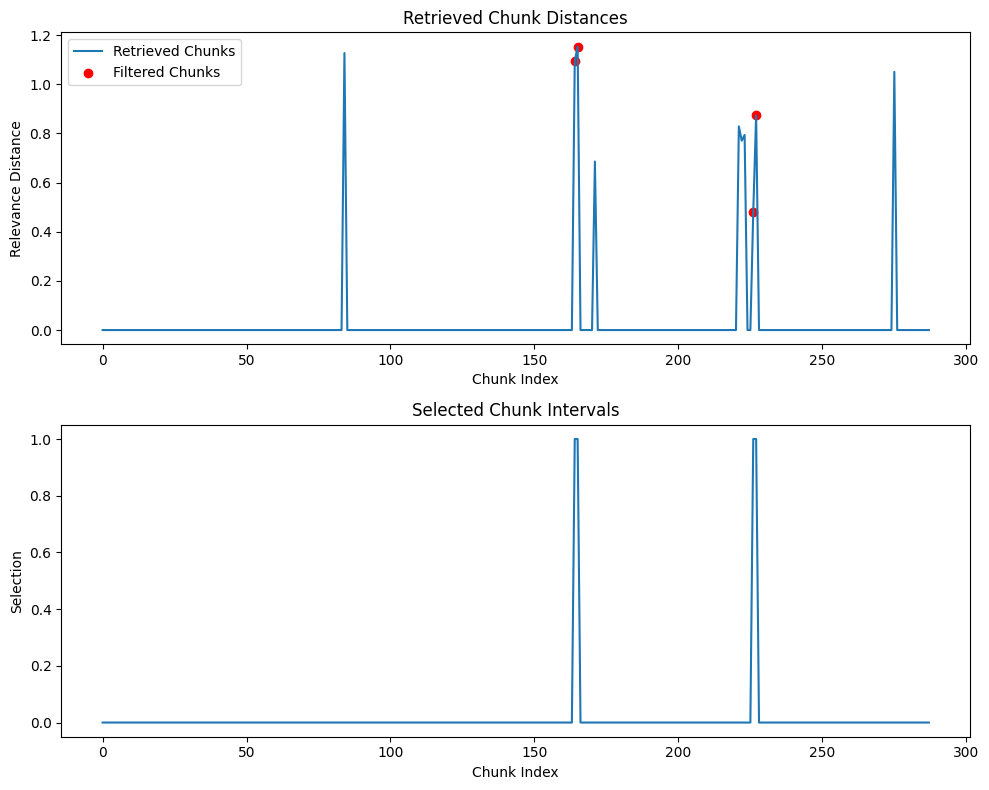

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# First subplot
axes[0].plot(all_chunks_retrieved_dist, label='Retrieved Chunks')
axes[0].scatter(filtered_chunk_indices, filtered_chunk_distances, color='red', label='Filtered Chunks')
axes[0].set_title('Retrieved Chunk Distances')
axes[0].set_xlabel('Chunk Index')
axes[0].set_ylabel('Relevance Distance')
axes[0].legend()


# Second subplot
axes[1].plot(selected_chunk_indices)
axes[1].set_title('Selected Chunk Intervals')
axes[1].set_xlabel('Chunk Index')
axes[1].set_ylabel('Selection')

plt.tight_layout()
plt.show()


## 6. Listening to the retrieved target and non-target chunks!

In [ ]:
extractedChunks = []
extractedChunkTimings = []

for (start, end) in myMainGroupChunkExtentsMerged:
  thisGroupChunks = []
  for chunk in chunks_left:
    if chunk['chunk_id'] >= start and chunk['chunk_id'] <= end:
      thisGroupChunks.append(chunk)
  extractedChunkTimings.append((thisGroupChunks[0]['start_time'], thisGroupChunks[-1]['end_time']))
  extractedChunks.append(thisGroupChunks)

In [ ]:
extractedChunkTimings

[(1940.02, 1963.02), (2628.84, 2653.84)]

In [ ]:
import soundfile as sf
import numpy as np
from IPython.display import Audio, display

In [ ]:
# Beamformed audio
targetPath = projDir + "real_recordings/FullTest_Sep_Conv1_Crop.wav"
nontargetPath = projDir + "real_recordings/FullTest_Sep_Conv2_Crop.wav"

In [ ]:
# Ground truth audio
targetPath = projDir + "audio/Conv1_mono.wav"
nontargetPath = projDir + "audio/Conv2_mono.wav"

In [ ]:
# Listen to the segments retrieved

audio_data, sr = sf.read(targetPath)   # audio_data is an (N, C) or (N,) NumPy array
print("--------"*10)
print(f"Sample rate: {sr} Hz  |  duration: {len(audio_data)/sr:.2f} s")
print("--------"*10)
print("\n")
def play_clip(arr, sr, title=""):
    """Display an inline audio widget for a NumPy array segment."""
    # if title:
    #     display({"text/plain": title}, raw=True)

    display(Audio(arr, rate=sr, autoplay=False))
    print("--------"*10)
    print("\n")

# Iterate through requested segments
for i, (start_t, end_t) in enumerate(extractedChunkTimings, 1):
    print("--------"*10)
    # sanity checks
    if start_t < 0 or end_t <= start_t:
        print(f"⛔️ Segment {i} ignored (invalid times)")
        continue

    start_samp = int(start_t * sr)
    end_samp   = int((end_t+1)   * sr) # Adding +1 manually.

    if start_samp >= len(audio_data):
        print(f"⛔️ Segment {i} starts after file ends — skipped")
        continue

    clip = audio_data[start_samp : min(end_samp, len(audio_data))]
    print(f"▶️ Segment {i}: {start_t:.2f} – {min(end_t, len(audio_data)/sr):.2f} s")
    play_clip(clip, sr, title=f"Segment {i}")

--------------------------------------------------------------------------------
Sample rate: 8000 Hz  |  duration: 3644.00 s
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
▶️ Segment 1: 1940.02 – 1963.02 s


--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
▶️ Segment 2: 2628.84 – 2653.84 s


--------------------------------------------------------------------------------




In [ ]:
# Find overlapping segments in the other conversation
def overlaps(start1, end1, start2, end2):
    return max(start1, start2) < min(end1, end2)

In [ ]:
extractedChunksNonTarget = []
extractedChunkTimingsNonTarget = []

for (start, end) in extractedChunkTimings:
  thisGroupChunks = []
  for chunk in chunks_right:
    if overlaps(start, end, chunk['start_time'], chunk['end_time']):
      thisGroupChunks.append(chunk)
  if thisGroupChunks:
    extractedChunkTimingsNonTarget.append((thisGroupChunks[0]['start_time'], thisGroupChunks[-1]['end_time']))
    extractedChunksNonTarget.append(thisGroupChunks)

In [ ]:
# What was in the other conversation?

audio_data, sr = sf.read(nontargetPath)   # audio_data is an (N, C) or (N,) NumPy array
print("--------"*20)
print(f"Sample rate: {sr} Hz  |  duration: {len(audio_data)/sr:.2f} s")
print("--------"*20)
print("\n")

# Iterate through requested segments
for i, (start_t, end_t) in enumerate(extractedChunkTimingsNonTarget, 1):
    print("--------"*20)
    # sanity checks
    if start_t < 0 or end_t <= start_t:
        print(f"⛔️ Segment {i} ignored (invalid times)")
        continue

    start_samp = int(start_t * sr)
    end_samp   = int((end_t+1)   * sr) # Adding +1 manually.

    if start_samp >= len(audio_data):
        print(f"⛔️ Segment {i} starts after file ends — skipped")
        continue

    clip = audio_data[start_samp : min(end_samp, len(audio_data))]
    print(f"▶️ Segment {i}: {start_t:.2f} – {min(end_t, len(audio_data)/sr):.2f} s")
    play_clip(clip, sr, title=f"Segment {i}")

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Sample rate: 8000 Hz  |  duration: 3644.00 s
----------------------------------------------------------------------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------------------------------------------------------------------
▶️ Segment 1: 1936.80 – 1966.80 s


--------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------------------------------------------------------------------
▶️ Segment 2: 2626.72 – 2655.54 s


--------------------------------------------------------------------------------




In [ ]:
def summarize_missed_segments(target_text, nontarget_text):

 # Build formatted contrastive input

    paired_descriptions = []
    for t, nt in zip(target_text, nontarget_text):
        paired_descriptions.append(f"Attended:\n\"{t}\"\n, Missed:\n\"{nt}\"\n")

    # Combine into a full prompt
    # prompt = (
    #     "You are an intelligent assistant helping summarize overlapping conversations.\n"
    #     "For each pair of attended and missed conversation chunks, summarize it naturally like:\n"
    #     "\"While you were listening to [summary of target], you missed [summary of nontarget].\"\n"
    #     "Here are the pairs:\n\n"
    #     + "\n\n".join(paired_descriptions)
    # )

    prompt = (
        "You are an intelligent assistant helping summarize overlapping conversations.\n"
        "Given these pairs of attended and missed conversation chunks, write a list of bullet points.\n"
        "Each bullet should describe one pair, starting with:\n"
        "\"While you were listening to ... you missed ...\"\n\n"
        "Here are the pairs:\n\n" +
        "\n\n".join(paired_descriptions)
    )

    # Call LLM
    response = client.responses.create(
        model="gpt-4o-mini",
        input=[{"role": "user", "content": prompt}],
        temperature=0.5
    )

    return response.output_text


In [ ]:
# Summarize the other conversation with an LLM

target_text = []
for groupOfChunks in extractedChunks:
  groupOfChunksText = [chunk['text'] for chunk in groupOfChunks]
  groupOfChunksText = " ".join(groupOfChunksText)
  target_text.append(groupOfChunksText)

nontarget_text = []
for groupOfChunks in extractedChunksNonTarget:
  groupOfChunksText = [chunk['text'] for chunk in groupOfChunks]
  groupOfChunksText = " ".join(groupOfChunksText)
  nontarget_text.append(groupOfChunksText)

missedSummary = summarize_missed_segments(target_text, nontarget_text)

In [ ]:
target_text

["So, one different form is reinforcement learning.  So, in reinforcement learning, you don't tell the system the correct answer.  You just tell it whether the answer it produced was good or bad. You give it a single number that tells it your answer was good or was bad.  And what happens next?  Say I'm a reinforcement learning engine and you tell me an answer was good or bad.",
 "You know, it's very efficient.  If you want to train a system to play chess or go or things like that,  like that, poker, reinforcement learning is great because you can have the system play millions of games against itself or copies of itself.  And it can adjust it, you know, it wins or loses the game.  So it knows which policy, which flavor of the neural net won the game and sort of reinforces that"]

In [ ]:
pprint(target_text)

['So, one different form is reinforcement learning.  So, in reinforcement '
 "learning, you don't tell the system the correct answer.  You just tell it "
 'whether the answer it produced was good or bad. You give it a single number '
 'that tells it your answer was good or was bad.  And what happens next?  Say '
 "I'm a reinforcement learning engine and you tell me an answer was good or "
 'bad.',
 "You know, it's very efficient.  If you want to train a system to play chess "
 'or go or things like that,  like that, poker, reinforcement learning is '
 'great because you can have the system play millions of games against itself '
 'or copies of itself.  And it can adjust it, you know, it wins or loses the '
 'game.  So it knows which policy, which flavor of the neural net won the game '
 'and sort of reinforces that']


In [ ]:
pprint(nontarget_text[1])

("Where should one begin?  It works really well for games.  I would... It's "
 'very efficient.  First, I would say  start watching content because that is '
 "the easiest way  of learning something,  watching videos. I'm just answering "
 'from  the human brain point of view  that we learn the best through visual '
 'cues.  Visual consequences.  Right? So if something is going like this,  '
 "that's the reason why  we are all hooked to Instagram because video trumps "
 'photo  and photo trumps text.  Right? So if you want to get interested  in '
 'something which is dull  and boring like you mentioned')


In [ ]:
import textwrap

wrapped_text = textwrap.wrap(missedSummary, width=40)
for line in wrapped_text:
        print(line)

- While you were listening to the
explanation of reinforcement learning
and how it evaluates answers based on
good or bad feedback, you missed a
discussion about small finance banks
offering 2% extra interest rates
compared to normal banks due to their
lending practices and RBI's insurance on
deposits up to 5 lakhs.  - While you
were listening to the efficiency of
reinforcement learning in training
systems for games like chess and poker,
you missed advice on starting to learn
about new topics, emphasizing the
importance of visual content and how it
engages the human brain better than text
or photos.


## Ideas

1. Cluster the vector embeddings? Get topics? Retrieve all records corresponding to that?
2. Use PyAnnote for speaker diarization? See pyannote-whisper package.